# Texas Storm Impact Analysis (2010–2025)

This notebook explores NOAA Storm Events data for Texas to identify
high-damage storm types, temporal trends, and seasonal patterns.


In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt

FIG_DIR = "../reports/figures"
os.makedirs(FIG_DIR, exist_ok=True)

plt.style.use("default")

df = pd.read_parquet("../data/interim/tx_2010_2025.parquet")
df.head()


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,...,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,DAMAGE_PROPERTY_USD,DAMAGE_CROPS_USD,TOTAL_DAMAGE_USD,BEGIN_YEAR,BEGIN_MONTH
0,201010,24,2117,201010,24,2117,44690,259274,TEXAS,Thunderstorm Wind,...,0,0.00K,0.00K,Broadcast Media,52.00,0.0,0.0,0.0,2010,10
1,201010,24,2117,201010,24,2117,44690,259276,TEXAS,Hail,...,0,0.00K,0.00K,Broadcast Media,2.75,0.0,0.0,0.0,2010,10
2,201010,24,1946,201010,24,1946,44690,259261,TEXAS,Hail,...,0,0.00K,0.00K,Trained Spotter,1.00,0.0,0.0,0.0,2010,10
3,201010,23,1837,201010,23,1837,44689,259197,TEXAS,Thunderstorm Wind,...,0,0.00K,0.00K,Emergency Manager,52.00,0.0,0.0,0.0,2010,10
4,201010,24,1338,201010,24,1338,44690,259205,TEXAS,Hail,...,0,0.00K,0.00K,Storm Chaser,2.50,0.0,0.0,0.0,2010,10


In [33]:
df.shape

(76392, 25)

In [35]:
total_damage = df["TOTAL_DAMAGE_USD"].sum()
total_events = len(df)

total_damage, total_events


(np.float64(82617667850.0), 76392)

## Top Storm Event Types by Total Damage

We aggregate total damage across all events to identify which
storm types account for the highest economic impact in Texas.


In [36]:
top_events = (
    df.groupby("EVENT_TYPE", as_index=False)["TOTAL_DAMAGE_USD"]
      .sum()
      .sort_values("TOTAL_DAMAGE_USD", ascending=False)
      .head(10)
)

top_events


,EVENT_TYPE,TOTAL_DAMAGE_USD
11,Flash Flood,4.821146e+10
16,Hail,1.047586e+10
22,Hurricane (Typhoon),6.193080e+09
6,Drought,6.161260e+09
34,Tropical Storm,3.473011e+09
32,Tornado,3.361200e+09
12,Flood,1.184962e+09
31,Thunderstorm Wind,8.930278e+08
35,Wildfire,8.873014e+08
29,Storm Surge/Tide,5.890057e+08


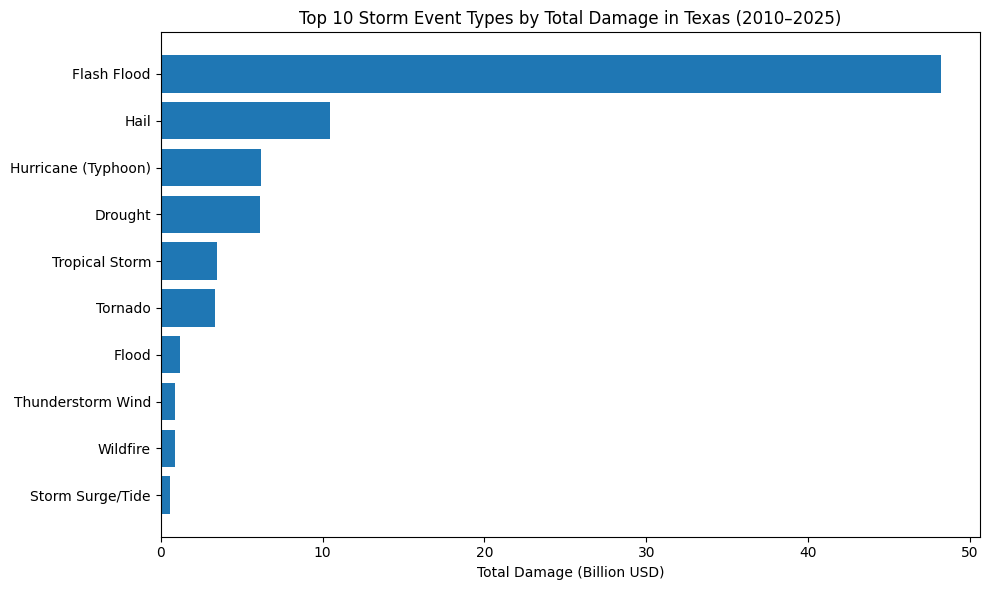

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(
    top_events["EVENT_TYPE"],
    top_events["TOTAL_DAMAGE_USD"] / 1e9
)
ax.set_xlabel("Total Damage (Billion USD)")
ax.set_title("Top 10 Storm Event Types by Total Damage in Texas (2010–2025)")
ax.invert_yaxis()

fig.tight_layout()
fig.savefig(f"{FIG_DIR}/top_event_types_damage.png", dpi=150)
plt.show()


## Damage Trends Over Time

Next, we examine how total storm damage varies by year to identify
trends and extreme outlier years.


In [39]:
damage_by_year = (
    df.groupby("BEGIN_YEAR", as_index=False)["TOTAL_DAMAGE_USD"]
      .sum()
)
damage_by_year


,BEGIN_YEAR,TOTAL_DAMAGE_USD
0,2010,3.448170e+08
1,2011,2.978887e+09
2,2012,3.518060e+09
3,2013,3.658646e+09
4,2014,1.150440e+09
5,2015,2.598696e+09
6,2016,3.611895e+09
7,2017,5.163176e+10
8,2018,3.386205e+08
9,2019,3.100531e+09


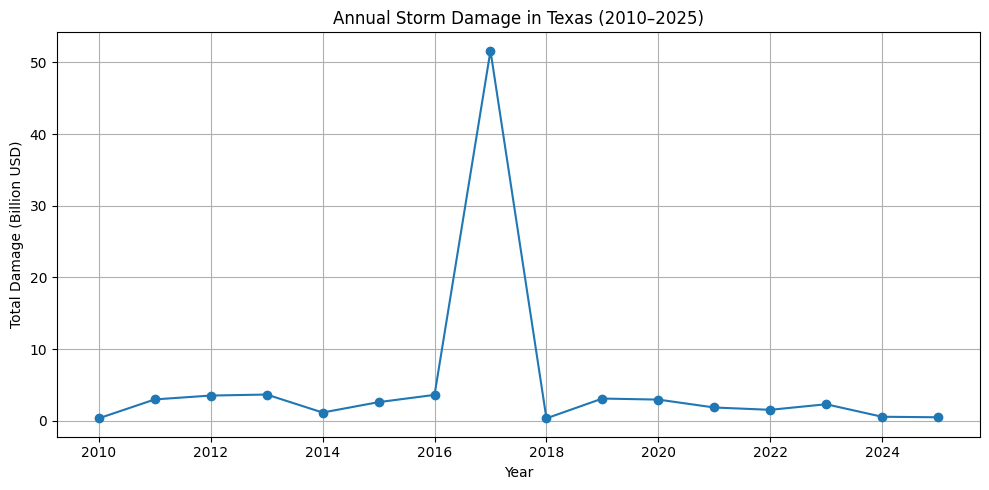

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    damage_by_year["BEGIN_YEAR"],
    damage_by_year["TOTAL_DAMAGE_USD"] / 1e9,
    marker="o"
)

ax.set_xlabel("Year")
ax.set_ylabel("Total Damage (Billion USD)")
ax.set_title("Annual Storm Damage in Texas (2010–2025)")
ax.grid(True)

fig.tight_layout()
fig.savefig(f"{FIG_DIR}/damage_by_year.png", dpi=150)
plt.show()


## Seasonal Patterns

We analyze storm damage by month to understand seasonal risk patterns.


In [41]:
damage_by_month = (
    df.groupby("BEGIN_MONTH", as_index=False)["TOTAL_DAMAGE_USD"]
      .sum()
)
damage_by_month



,BEGIN_MONTH,TOTAL_DAMAGE_USD
0,1,5.021547e+08
1,2,1.414657e+09
2,3,2.587234e+09
3,4,4.285799e+09
4,5,4.680761e+09
5,6,4.634091e+09
6,7,2.051823e+09
7,8,5.469203e+10
8,9,2.057190e+09
9,10,3.859696e+09


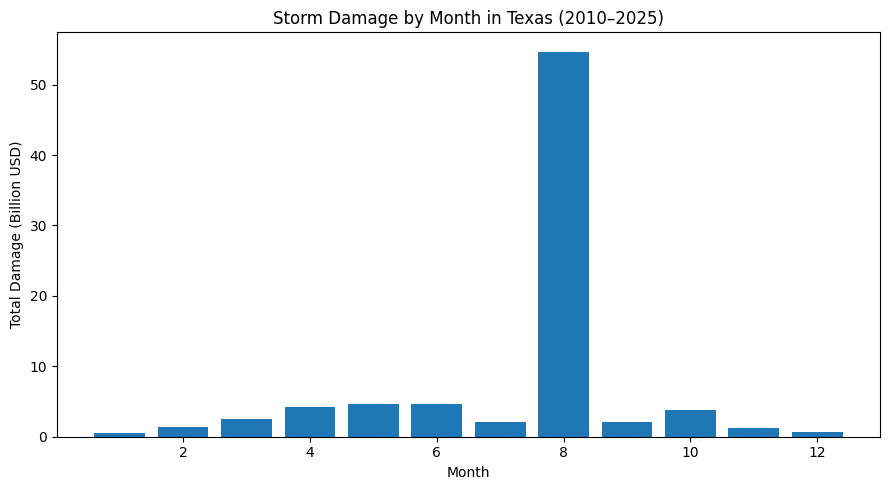

In [42]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.bar(
    damage_by_month["BEGIN_MONTH"],
    damage_by_month["TOTAL_DAMAGE_USD"] / 1e9
)

ax.set_xlabel("Month")
ax.set_ylabel("Total Damage (Billion USD)")
ax.set_title("Storm Damage by Month in Texas (2010–2025)")

fig.tight_layout()
fig.savefig(f"{FIG_DIR}/damage_by_month.png", dpi=150)
plt.show()


## Key Takeaways

- A small number of storm types account for the majority of total damage.
- Damage is highly uneven across years, with extreme outliers.
- Seasonal patterns suggest elevated risk during spring and late summer.
